###  EDA-3. Проектирование признаков: Создание признаков. Работа с форматом «дата-время»
Будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет

In [159]:
# Прочитаем данные:

import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [160]:
# Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора.
# Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


###  Задание 4.1
Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.
В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [161]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

###  Задание 4.2
Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.
В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [162]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x >10 else 0)
calls['is_connection'].sum()

7

###  Задание 4.3
Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [163]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [164]:
# После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны: 
# передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать 
# только с числами, даты и текст ей недоступны, поэтому удалим их:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [165]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


###  Задание 5.9 (Самопроверка)
Используйте следующий датафрейм для задания:

    list_of_dicts = [
    {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
    {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
    {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
    ]
    df = pd.DataFrame(list_of_dicts)

Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [166]:
import pandas as pd

# Датасет из задания
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [167]:
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [168]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)

df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


In [169]:
#Прочитаем новый датасет и посмотрим на первые несколько строк.

import pandas as pd

heart = pd.read_csv('Data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###  Задание 8.1
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
В ответ введите результат выполнения кода heart['old'].sum().

In [170]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

###  Задание 8.2
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [171]:
def set_avg_trestbps(x):
    if x['sex'] == 1:
        if x['age'] <= 20: return 123
        if x['age'] <= 30: return 126
        if x['age'] <= 40: return 129
        if x['age'] <= 50: return 135
        if x['age'] <= 60: return 142
        else: return 142
        
    else:
        if x['age'] <= 20: return 116
        if x['age'] <= 30: return 120
        if x['age'] <= 40: return 127
        if x['age'] <= 50: return 137
        if x['age'] <= 60: return 144
        else: return 159
    
heart['trestbps_mean'] = heart.apply(set_avg_trestbps, axis=1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [172]:
#heart[heart.index == 300]['trestbps_mean']
heart['trestbps_mean'][300]

142

In [173]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


###  Задание 8.5
Раскодируйте признаки методом OneHotEncoding без удаления исходных признаков.
Сколько признаков получилось в датасете?
cp, restecg, slope, ca, thal

In [174]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['cp','restecg', 'slope', 'ca', 'thal'])
cols = encoder.fit_transform(heart[['cp','restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, cols], axis=1)

In [175]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0


###  Задание 8.6
Нормализуйте все числовые признаки подходящим способом.
В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.
age, thalach, oldpeak, trestbps_mean

In [176]:
# для нормализации, стандартизации
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
heart[['age_rb', 'trestbps_rb', 'chol_rb', 'thalach_rb', 'oldpeak_rb', 'trestbps_mean_rb']] = scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']])
heart[['age_rb', 'trestbps_rb', 'chol_rb', 'thalach_rb', 'oldpeak_rb', 'trestbps_mean_rb']] = pd.DataFrame(heart[['age_rb', 'trestbps_rb', 'chol_rb', 'thalach_rb', 'oldpeak_rb', 'trestbps_mean_rb']], columns=['age_rb', 'trestbps_rb', 'chol_rb', 'thalach_rb', 'oldpeak_rb', 'trestbps_mean_rb'])


In [177]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_1,thal_2,thal_3,thal_4,age_rb,trestbps_rb,chol_rb,thalach_rb,oldpeak_rb,trestbps_mean_rb
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.059406,0.547855,0.386139,0.006601,-0.046938,0.081188,0.098646,-0.103173,0.149752,-0.066007
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.236774,0.498528,0.487668,0.081110,0.672748,0.876907,0.816232,0.704774,0.725672,1.487564
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000,-3.200000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000,-1.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,0.000000,1.000000,1.000000,0.000000,0.444444,0.500000,0.543307,0.400000,0.500000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.629630,3.500000,5.102362,1.507692,3.375000,3.400000


###  Задание 8.7
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<AxesSubplot:>

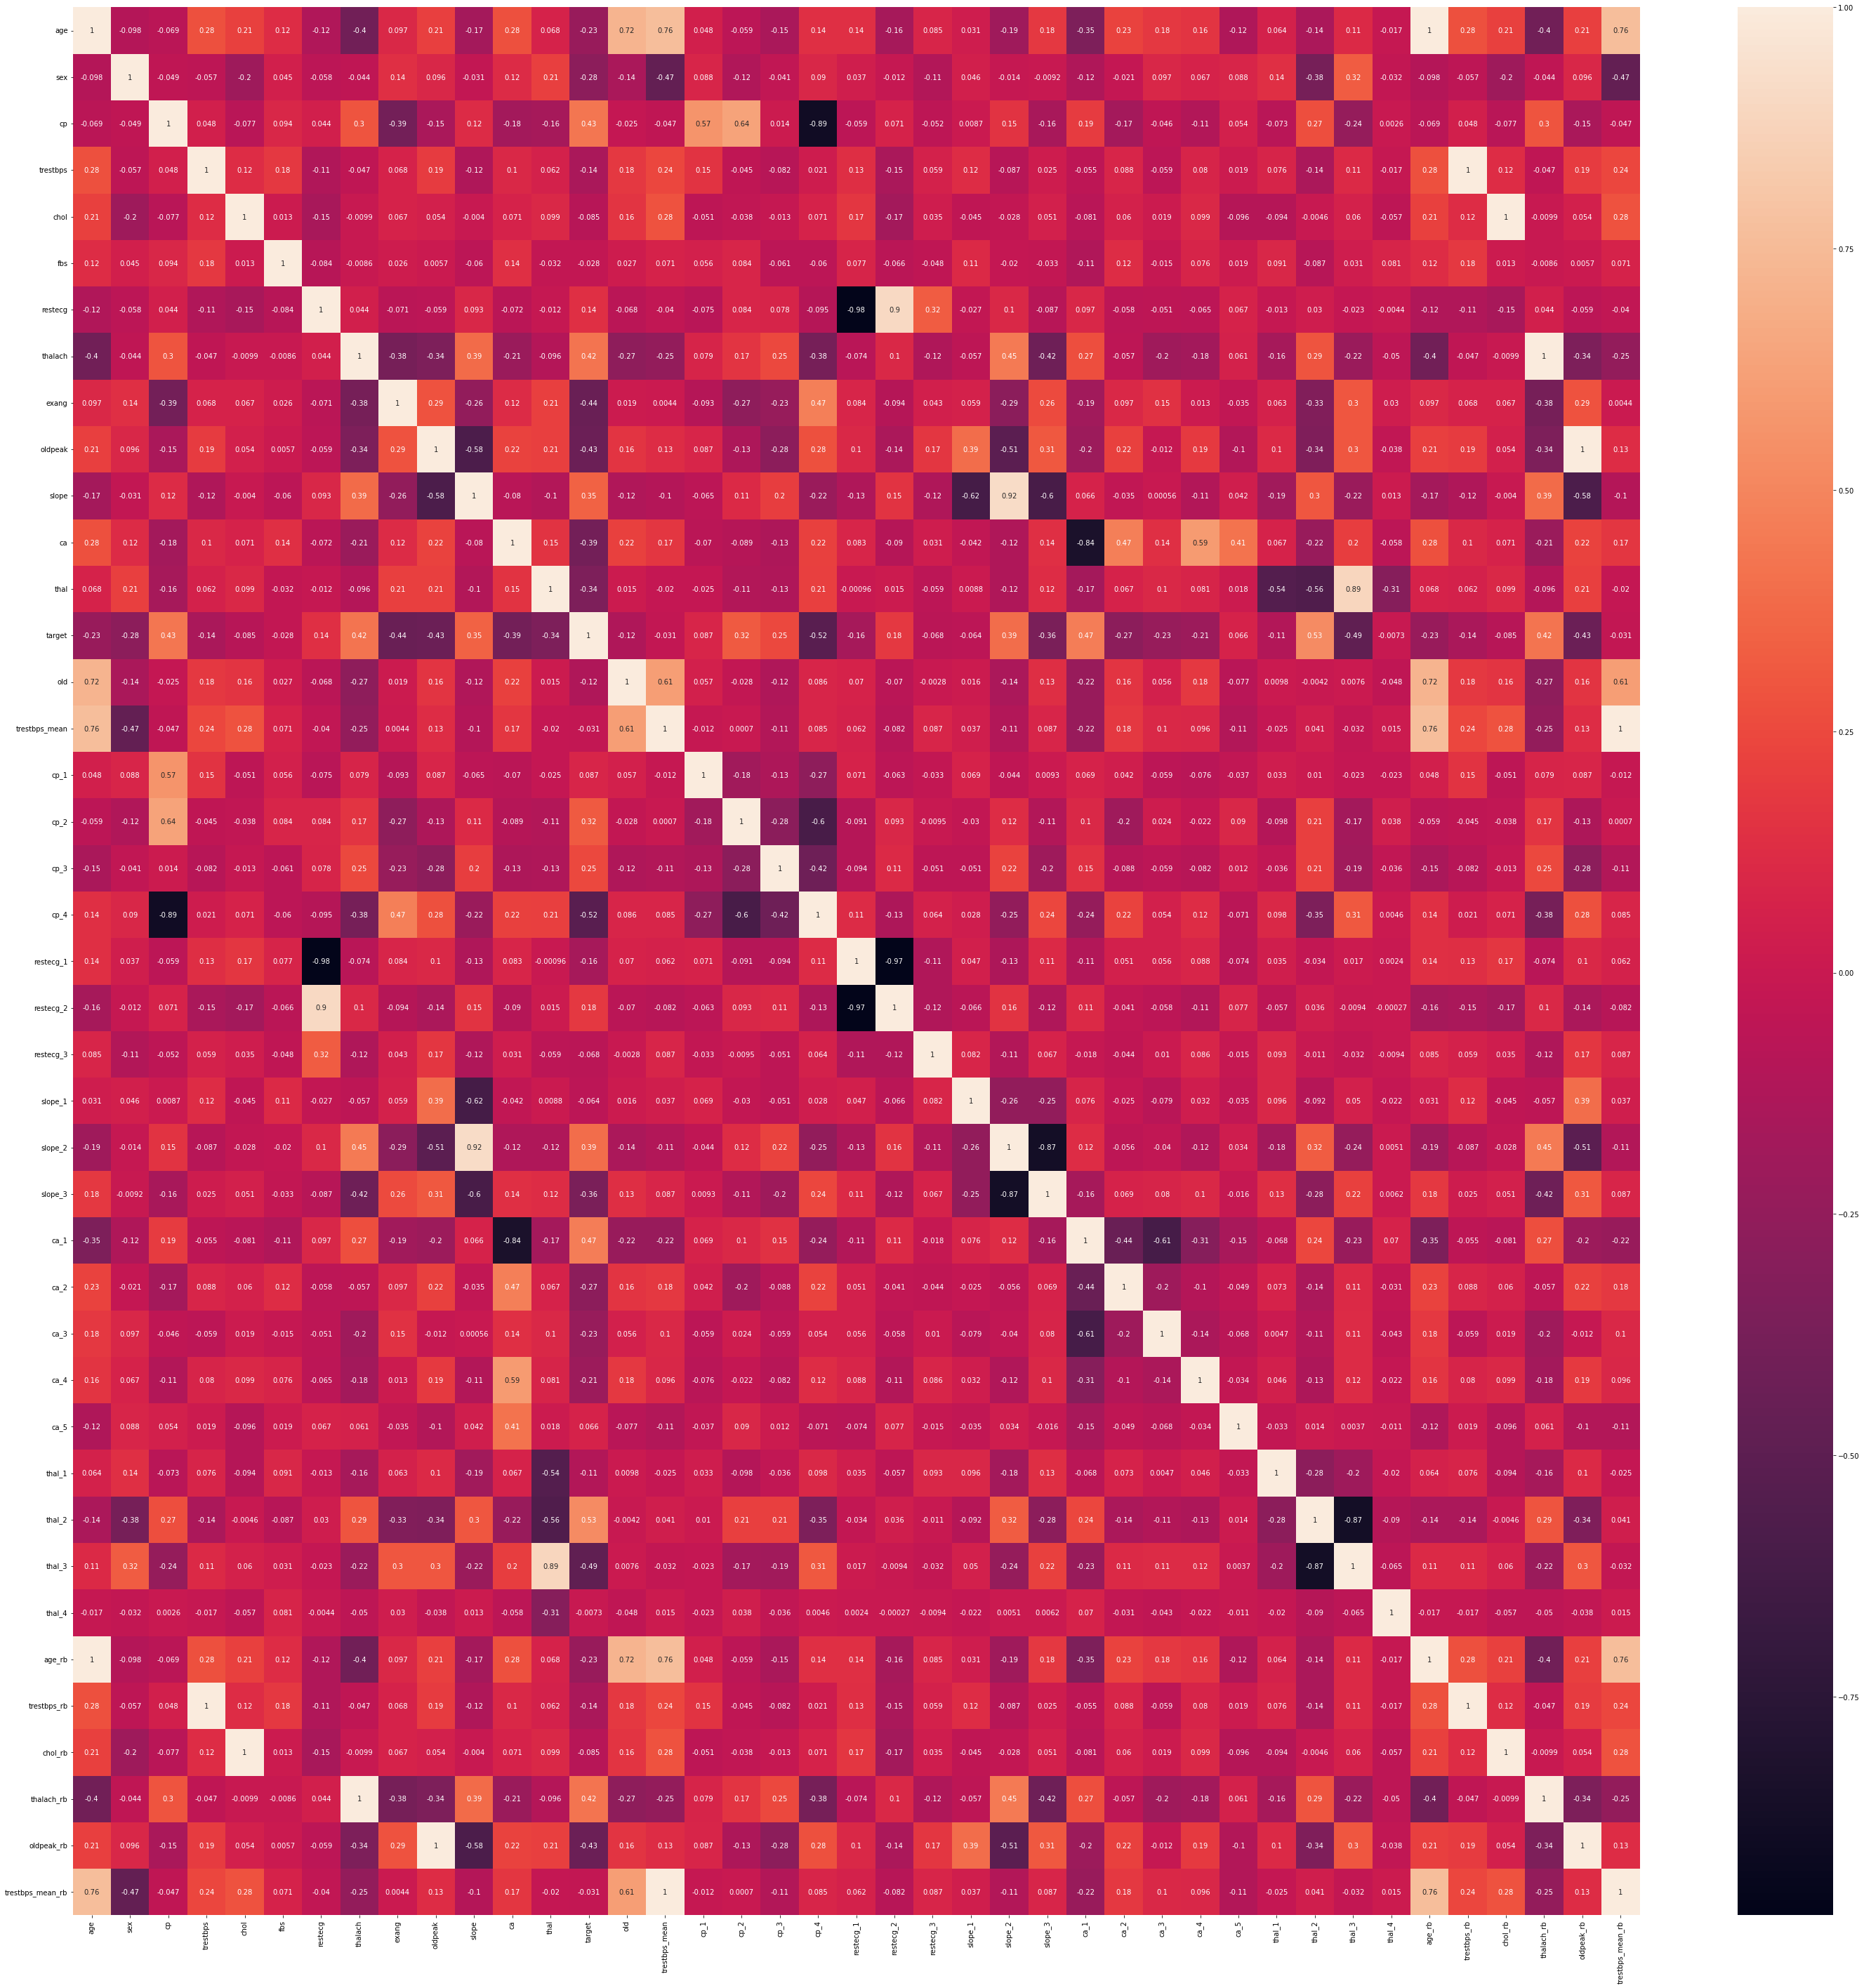

In [180]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(50, 50))
sns.heatmap(heart.corr(), annot=True) # включаем отображение коэффициентов